In [1]:
#importo la libreria de estadistica y matematica
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("c:\\ia\\Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#creo una variable para mi modelo lineal le diga que usare los minimos cuadrados (ols)
#fit el metodo que indica modela
lm = smf.ols(formula="Sales~Radio",data = data).fit()

In [5]:
lm.params

Intercept    9.311638
Radio        0.202496
dtype: float64

In [6]:
#ventas = 9.311638 + Radio* 0.202496
#obteno los errores cuadrados
lm.rsquared

0.33203245544529525

In [7]:
lm.rsquared_adj

0.32865888198794835

In [8]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           4.35e-19
Time:                        16:54:24   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
sales_pred = lm.predict(pd.DataFrame(data["Radio"]))

In [20]:
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

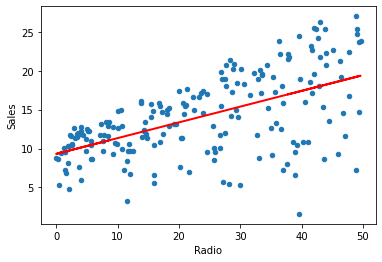

In [11]:
#graficando los datos y la regresion lineal
data.plot(kind="scatter", x="Radio", y ="Sales")
plt.plot(pd.DataFrame(data["Radio"]),sales_pred, c="red",linewidth =2)

In [12]:
#agrego columna de prediccion = a +bx
data["sales_pred"]=9.311638 + data["Radio"]* 0.202496

In [13]:
#Calculo el error de la prediccion - lo real y lo elevo al cuadrado para quitar signo
data["RSE"]=(data["Sales"]-data["sales_pred"])**2

In [14]:
# sumo los errore
SSD=sum(data["RSE"])
SSD

3618.4795490320344

In [15]:
#calcular los errores residuales - 2 porque son dos variables
RSE = np.sqrt(SSD/(len(data)-2))
RSE

4.274944354905164

In [16]:
#Calculo el promedio de la ventas
sales_m = np.mean(data["Sales"])
sales_m

14.022500000000003

In [17]:
error = RSE / sales_m
error

0.30486320947799345

(array([ 1.,  1.,  8., 11., 18., 23., 44., 54., 30., 10.]),
 array([-15.7304796 , -13.33932824, -10.94817688,  -8.55702552,
         -6.16587416,  -3.7747228 ,  -1.38357144,   1.00757992,
          3.39873128,   5.78988264,   8.181034  ]),
 <BarContainer object of 10 artists>)

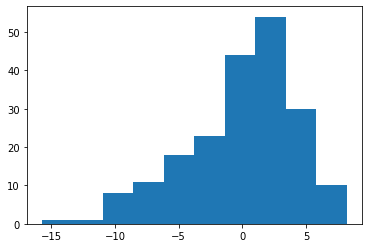

In [18]:
plt.hist((data["Sales"]-data["sales_pred"]))